In [ ]:
from IPython.display import HTML

# Crea un título en negrita y rojo utilizando HTML y CSS
html_titulo = '<h1 style="text-align:center; color:red; font-weight:bold;">Mercado Hipotecario en España. Año 2021</h1>'

# Muestra el título en negrita y rojo
display(HTML(html_titulo))


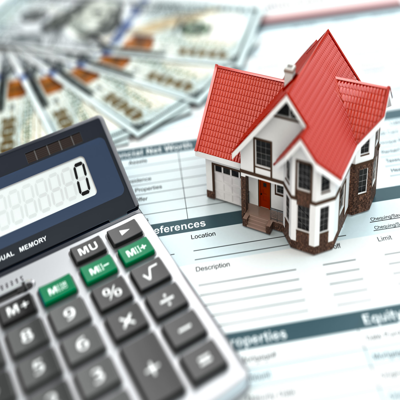

In [ ]:
from PIL import Image
from IPython.display import display, HTML

# Cargar la imagen en un objeto Image de PIL
imagen = Image.open("/content/mejores-hipotecas-scaled.jpg")

# Redimensionar la imagen a un tamaño más pequeño
tamaño_nuevo = (400, 400)
imagen_pequeña = imagen.resize(tamaño_nuevo)
display(imagen_pequeña)

**El mercado de las hipotecas en España ha sido durante mucho tiempo uno de los más importantes y dinámicos del país. Las hipotecas se utilizan comúnmente para financiar la compra de viviendas y son una parte fundamental del mercado inmobiliario español. En los últimos años, el mercado de las hipotecas ha experimentado cambios significativos, especialmente después de la crisis financiera de 2008. Se han implementado regulaciones más estrictas para garantizar que los prestatarios estén protegidos y se eviten situaciones de riesgo para el sistema financiero. Nuestro objetivo en este cuaderno es conocer que variables independientes son de interés para estudiar el mercado inmobiliario y ver qué comunidades autónomas son las más parecidas y las más  diferentes en términos de variables hipotecarias y sociodemográficas.**



In [ ]:
from IPython.display import HTML
html_tit1 = '<h2 style="text-align:left; color:black;">Paso 1. Importar Datos y Librerías</h2>'
display(HTML(html_tit1))

In [1]:
#instalar modulo de mapas
!pip install geopandas
!pip install factor-analyzer
# Librerías para la preparación de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Librerías para el Modelado
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Librerías para la Visualización 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import numpy as np
from factor_analyzer import FactorAnalyzer
from IPython.display import display
from IPython.core.display import HTML

# Animación de gráficos
from IPython.display import Image
from matplotlib import animation

# Trabajo con mapas
import geopandas as gpd

# Cluster
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale


from google.colab import files
datos=pd.read_excel('/content/MercadoHipotecas.xlsx').set_index('CCAA')
display(datos.head())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 74.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 21.3 MB/s eta 0:00:00
  Created wheel for factor

KeyError: ignored

In [ ]:
html_tit1 = '<h2 style="text-align:left; color:black;">Paso 2. Análisis Descriptivo de los datos</h2>'
display(HTML(html_tit1))

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
# Cargar el conjunto de datos en un DataFrame de Pandas
datos=pd.read_excel('/content/MercadoHipotecas.xlsx').set_index('CCAA')
# Crear un objeto de perfilado de Pandas Profiling
perfil = ProfileReport(datos)
# Generar el informe de EDA. Para abrirlo, ejecuta el código y en los archivos temporales se guardará el informe.
perfil.to_file("informe_eda.html")


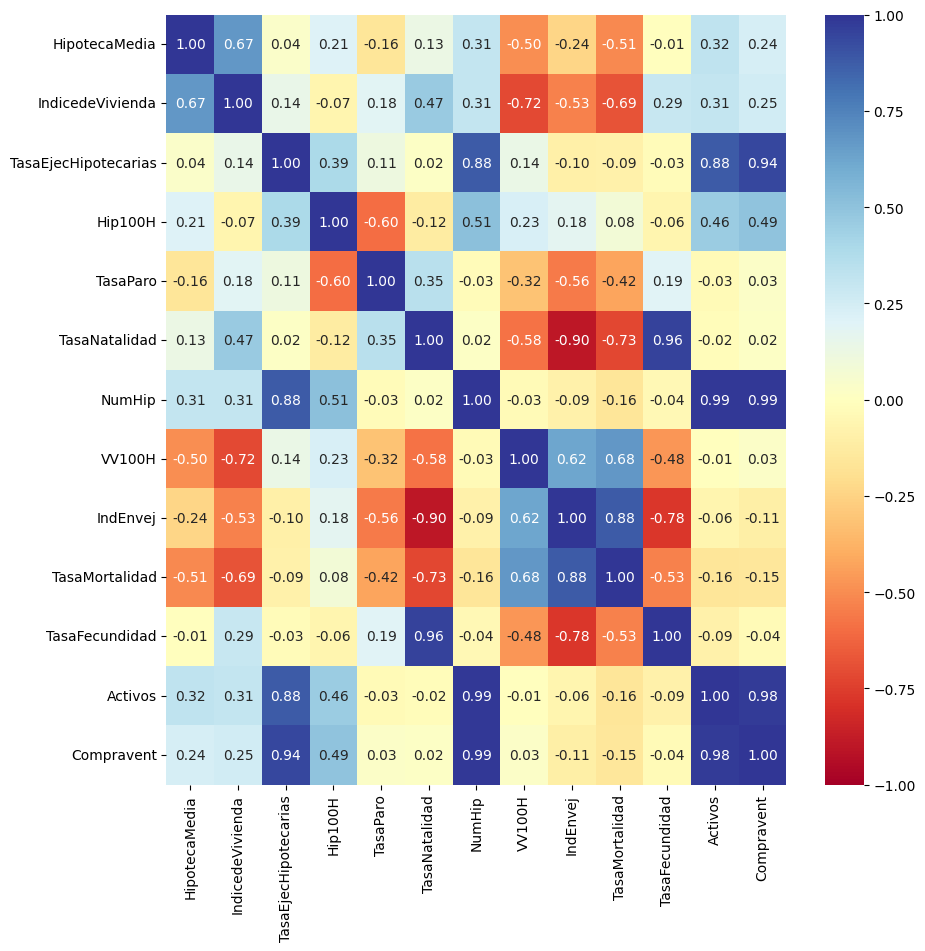

,HipotecaMedia,IndicedeVivienda,TasaEjecHipotecarias,Hip100H,TasaParo,TasaNatalidad,NumHip,VV100H,IndEnvej,TasaMortalidad,TasaFecundidad,Activos,Compravent
0,-0.201626,-0.046763,2.470430,0.977087,1.395658,0.380082,2.452680,0.104368,-0.580134,-0.214761,0.291484,2.242750,2.617362
1,-0.223880,-0.191187,-0.461480,0.407147,-0.991892,0.028986,-0.423698,0.119430,0.301026,0.727720,0.374431,-0.461111,-0.441709
2,-0.704379,-0.667906,-0.506607,0.055344,-0.503706,-1.671417,-0.560243,0.331645,2.137637,1.920802,-1.577727,-0.620011,-0.605836
3,2.786628,1.618368,-0.582717,0.155250,-0.013447,0.442040,-0.498720,-0.387809,-0.628854,-1.364260,-0.032590,-0.458309,-0.464477
4,0.093219,-0.029019,-0.120670,-1.168382,1.719561,-1.031184,-0.360560,-0.289707,-0.176260,-1.140897,-1.733977,-0.080232,-0.267578
5,-0.651008,-0.165211,-0.619761,0.980234,-0.720850,-1.058721,-0.664153,0.284667,0.689688,0.351817,-1.037604,-0.756497,-0.656626
6,-0.680144,-0.668546,-0.032436,-0.237017,-0.734325,-1.148216,-0.154599,1.235256,1.551227,1.408703,-0.767543,-0.095281,-0.141774
7,-0.309776,-1.320787,-0.451377,0.141936,0.146172,-0.046740,-0.204299,0.909596,-0.306549,0.133903,0.025280,-0.173650,-0.189775
8,1.120664,1.418973,1.782075,0.300957,-0.700639,0.242397,1.807740,-0.489632,-0.309635,-0.367301,0.129447,2.138124,1.762086
9,-0.770285,-0.388113,2.337070,0.914821,0.202661,-0.074277,1.081621,0.942485,-0.110123,0.057633,-0.071170,0.984118,1.497714


In [ ]:
# Calcula la matriz de correlaciones
correlaciones = datos.corr()
# Estandariza los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos)
# Crea un nuevo dataframe con los datos estandarizados
columnas = datos.columns
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns=columnas)
# Calcula la matriz de correlaciones de los datos estandarizados
correlaciones_estandarizadas = datos_estandarizados.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlaciones_estandarizadas, annot=True, fmt=".2f", cmap="RdYlBu", ax=ax, vmin=-1, vmax=1)
# Ajusta las etiquetas de los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# Muestra el plot
plt.show()
display(datos_estandarizados)

In [ ]:
# Crea un título en negrita y rojo utilizando HTML y CSS
html_tit1 = '<h2 style="text-align:left; color:black;">Paso 3. Análisis de Componentes Principales</h2>'

# Muestra el título en negrita y rojo
display(HTML(html_tit1))

Si tomamos demasiadas variables es difícil visualizar relaciones entre ellas.
Otro problema que se presenta es la fuerte correlación.
Se hace necesario, pues, reducir el número de variables sin perder
información. Es importante resaltar el hecho de que el concepto de mayor información se relaciona con el de mayor variabilidad o varianza.

Objetivo: Estudiar las relaciones que se presentan entre p variables correlacionadas (que miden información común) y transformar el conjunto original de variables en otro (que no tenga redundancia en la información) llamado conjunto de componentes principales. Las nuevas variables son combinaciones lineales de las anteriores y se van construyendo según el orden de importancia en cuanto a la variabilidad total que recogen de la muestra. **Se trata de obtener la mayor parte de la información o variabilidad de los datos.**



In [ ]:
# Crea un título en negrita y rojo utilizando HTML y CSS
html_tit1 = '<h3 style="text-align:left; color:black;">3.1 Concepto y Número de Componentes a retener. Analítica y Gráficamente.</h3>'

# Muestra el título en negrita y rojo
display(HTML(html_tit1))

Partiendo bien de la matriz de Correlaciones o de la matriz de Varianzas-
Covarianzas estimadas, se hallará su descomposición, en función de sus
valores propios y la matriz formada por sus autovectores correspondientes. En nuestro caso, con altas correlaciones como hemos visto en el mapa de calor, debemos utilizar la matriz de correlaciones.

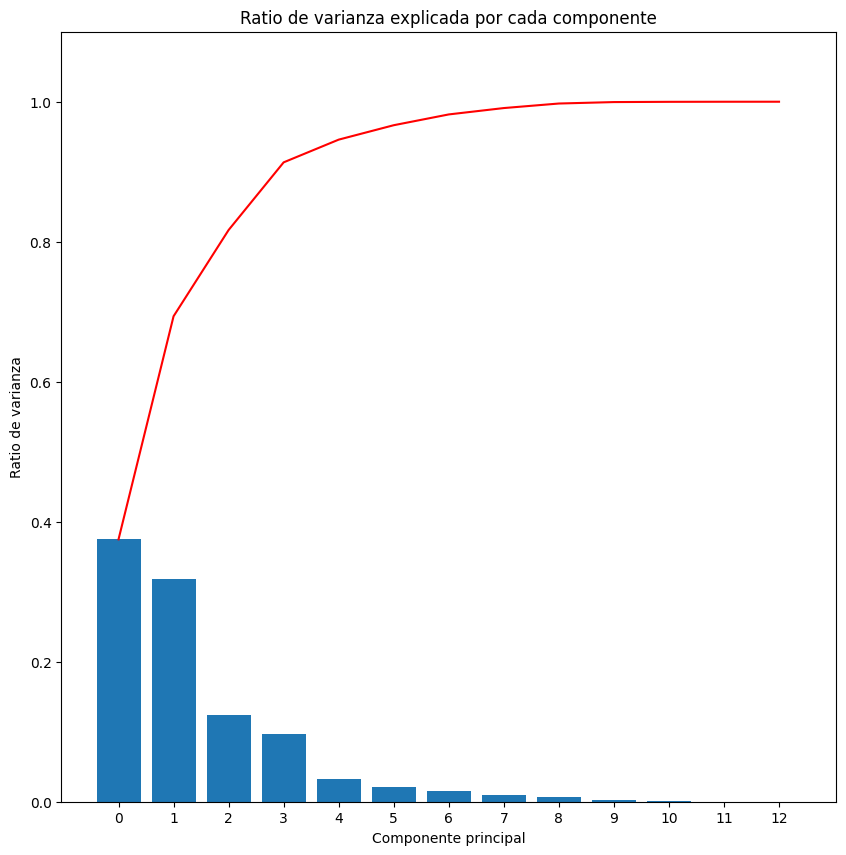

In [ ]:
np.random.seed(5)
# Crear el estimador de Componentes Principales
pca = PCA()

# Introducimos nuestros datos en el estimador
modelo_pca = pca.fit(datos_estandarizados)

# Porcentaje de la varianza total de los datos explicada por cada factor o componente principal
varianzas_ratio_comp = modelo_pca.explained_variance_ratio_

# Y los porcentajes acumulados de varianza explicada
acumulado = varianzas_ratio_comp.cumsum()

# Número de componentes principales o factores que pueden ser extraídos
n_comp = modelo_pca.n_components_

# Visualizamos los porcentajes de varianza explicados
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.bar(
    x      = np.arange(n_comp),
    height = varianzas_ratio_comp
)
ax.plot(acumulado, c='red')
ax.set_xticks(np.arange(n_comp))
ax.set_ylim(0, 1.1)
ax.set_title('Ratio de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Ratio de varianza');

El gráfico de eigenvalues es una herramienta útil para determinar el número de factores a retener en el análisis de factores. En el eje x, se muestra el número de factores y en el eje y, se muestran los eigenvalues correspondientes a cada factor. Los eigenvalues representan la cantidad de varianza total explicada por cada factor. En general, se busca retener los factores con eigenvalues mayores que 1, ya que estos explican más varianza que una sola variable original.

In [ ]:

# Creamos un diccionario con los datos de cada componente
datos_cp = {'% Varianza Explicada': varianzas_ratio_comp, 
           '% Varianza Acumulada': acumulado}

# Creamos el dataframe a partir del diccionario
df = pd.DataFrame(datos_cp)


# Creamos un diccionario con los datos de cada componente
datos_cp = {'% Varianza Explicada': varianzas_ratio_comp, 
            '% Varianza Acumulada': acumulado}

# Creamos el dataframe a partir del diccionario
df = pd.DataFrame(datos_cp)

# Creamos el objeto Styler para personalizar la tabla
tabla_personalizada = df.style\
    .set_properties(subset=['% Varianza Explicada', '% Varianza Acumulada'], 
                     **{'background-color': 'white', 'border': '1px solid black'})\
    .set_table_styles([{'selector': 'thead tr th',
                        'props': [('background-color', 'blue'), 
                                  ('color', 'white'), 
                                  ('font-weight', 'bold'), 
                                  ('border', '1px solid black')]},
                       {'selector': 'tbody tr:nth-child(1) th',
                        'props': [('background-color', 'blue'), 
                                  ('color', 'white'), 
                                  ('font-weight', 'bold'), 
                                  ('border', '1px solid black')]},
                       {'selector': 'tbody tr:nth-child(2) th:nth-child(2)',
                        'props': [('background-color', 'green'), 
                                  ('color', 'white'), 
                                  ('font-weight', 'bold'), 
                                  ('border', '1px solid black')]},
                       {'selector': 'tbody tr:nth-child(n+3)',
                        'props': [('background-color', 'white')]}])\
    .hide_index()

# Mostramos la tabla personalizada
tabla_personalizada




<ipython-input-43-031c05c94123>:20: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  tabla_personalizada = df.style\


% Varianza Explicada,% Varianza Acumulada
0.374826,0.374826
0.318701,0.693527
0.123205,0.816732
0.096665,0.913397
0.032443,0.945840
0.020599,0.966440
0.015416,0.981856
0.009093,0.990948
0.006482,0.997430
0.002061,0.999491


Recordamos que la idea básica de este método es describir la variabilidad y relaciones existentes en un conjunto de datos multivariante en términos de un nuevo conjunto incorrelado de variables,de dimensión menor, cada una de las cuales es una combinación lineal de las variables originales. 



El número óptimo de Componentes Principales lo determina la variabilidad explicada, que, como mínimo, ha de ser el 70%, pero a ser posible debe aumentar hasta el 80 o 90%. 



*   **La primera componente recoge la máxima información o variación de los datos originales.** En nuestro caso, con una componente explicaríamos el 37% de la variabilidad de los datos.

*    **La segunda componente se elige de forma que recoja la mayor cantidad de 
información, que no haya sido recogida por la primera.**   En nuestro caso, utilizando ambas componentes conseguiríamos explicar aproximadamente un 69% de la variabilidad de los datos.

Con dos componentes principales sería insuficiente, por tanto escogeremos hasta **4 componentes principales** para explicar la máxima varianza posible. Hay una diferencia sustancial entre la tercera y la cuarta componente, que hace que compense su elección.





In [ ]:
# Crea un título en negrita y rojo utilizando HTML y CSS
html_tit1 = '<h3 style="text-align:left; color:black;">3.2 Correlaciones entre Variables y Componentes.</h3>'

# Muestra el título en negrita y rojo
display(HTML(html_tit1))

In [ ]:
corre = modelo_pca.components_.T * np.sqrt(modelo_pca.explained_variance_)

corre_mostrar = pd.DataFrame(np.round(corre, 2), 
                             columns=['CP ' + str(i) for i in range(1, datos.shape[1]+1)]).\
                              set_index([datos.columns])
corre_mostrar.iloc[:, :4]



,CP 1,CP 2,CP 3,CP 4
HipotecaMedia,-0.53,-0.13,0.78,0.17
IndicedeVivienda,-0.80,0.07,0.43,0.25
TasaEjecHipotecarias,-0.43,-0.81,-0.39,0.05
Hip100H,-0.05,-0.67,0.27,-0.61
TasaParo,-0.40,0.36,-0.59,0.58
TasaNatalidad,-0.79,0.47,-0.21,-0.39
NumHip,-0.53,-0.86,-0.08,0.04
VV100H,0.72,-0.42,-0.32,-0.17
IndEnvej,0.87,-0.42,0.22,0.11
TasaMortalidad,0.89,-0.30,-0.11,-0.04


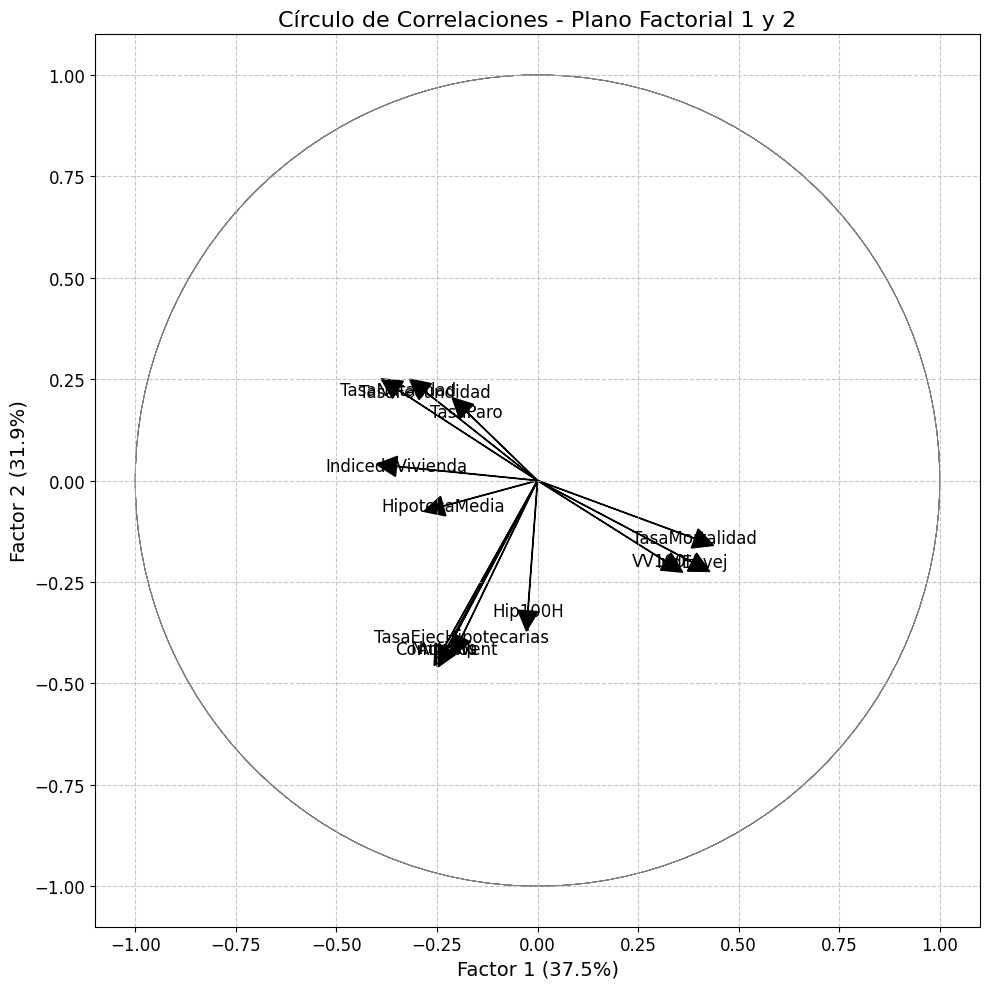

In [ ]:
# Obtener las coordenadas de las variables en el plano factorial 1 y 2
coords = pca.components_.T[:, :2]
# Obtener las varianzas explicadas por los ejes
varianzas = pca.explained_variance_ratio_[:2]
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Graficar el círculo de correlaciones
for i, (x, y) in enumerate(coords):
    ax.annotate(datos.columns[i], (x, y), ha='center', va='center', fontsize=12, color='black')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='gray', linewidth=0.5)
    ax.add_artist(circle)
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, linewidth=1, color='black')
# Configurar los ejes
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'Factor 1 ({varianzas[0]*100:.1f}%)', fontsize=14)
plt.ylabel(f'Factor 2 ({varianzas[1]*100:.1f}%)', fontsize=14)
plt.title('Círculo de Correlaciones - Plano Factorial 1 y 2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




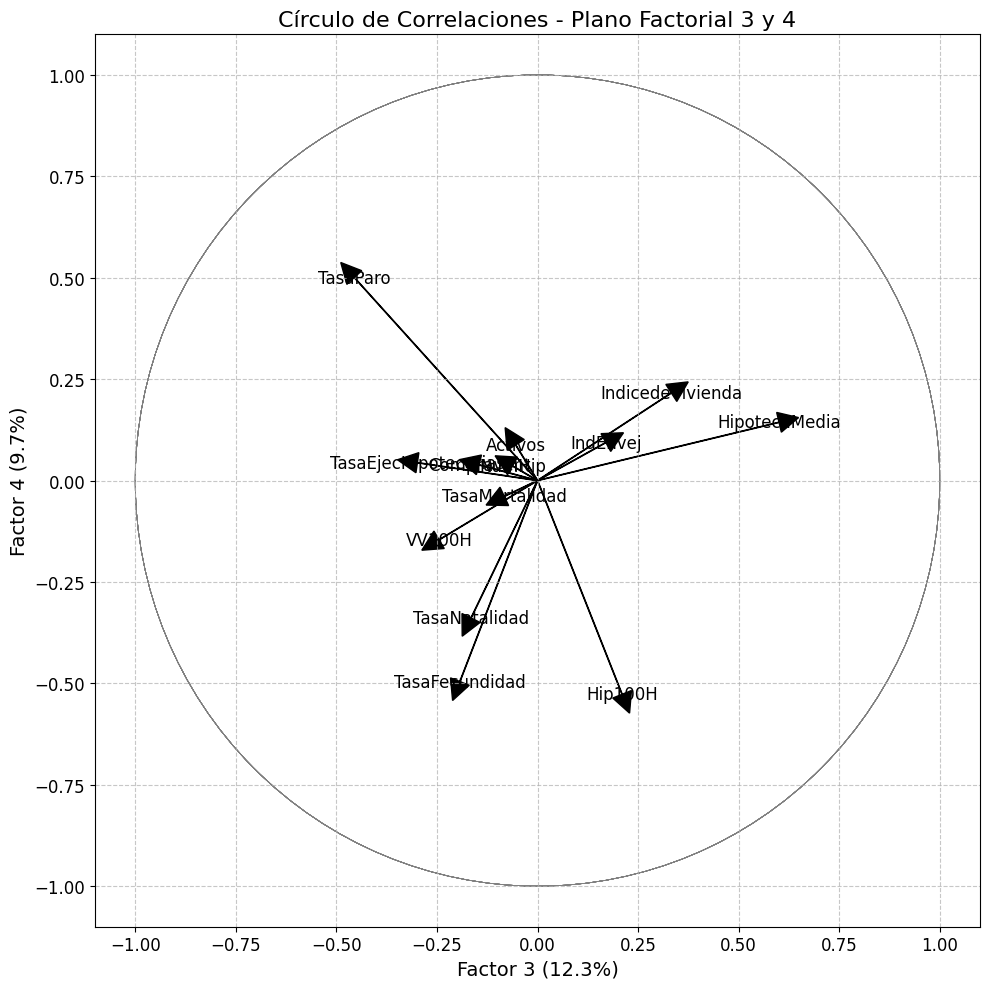

In [ ]:
# Obtener las coordenadas de las variables en el plano factorial 3 y 4
coords = pca.components_.T[:, 2:4]
# Obtener las varianzas explicadas por los ejes
varianzas = pca.explained_variance_ratio_[2:4]
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Graficar el círculo de correlaciones
for i, (x, y) in enumerate(coords):
    ax.annotate(datos.columns[i], (x, y), ha='center', va='center', fontsize=12, color='black')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='gray', linewidth=0.5)
    ax.add_artist(circle)
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, linewidth=1, color='black')
# Configurar los ejes
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'Factor 3 ({varianzas[0]*100:.1f}%)', fontsize=14)
plt.ylabel(f'Factor 4 ({varianzas[1]*100:.1f}%)', fontsize=14)
plt.title('Círculo de Correlaciones - Plano Factorial 3 y 4', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**RESUMEN DE RESULTADOS**

Los gráficos obtenidos muestran una visualización de las variables en función de las componentes principales 1 y 2, y 3 y 4. Las variables que tienen una correlación alta con la primera (y tercera) componente principal están más cerca del eje horizontal y las variables que tienen una alta correlación con la segunda componente principal(y cuarta) están más cerca del eje vertical. Las variables que se encuentran cerca del centro del gráfico tienen una correlación baja con ambas componentes principales, aún así nos guiaremos con la tabla para decidir qué variables están mejor explicadas por cada una de las componentes.
En resumen, estos gráficos proporcionan una representación visual de las relaciones entre las variables en función de las dos primeras componentes principales y las dos segundas, lo que puede ayudar a identificar patrones y tendencias en los datos.

Para concluir, utilizando tanto la tabla como los gráficos, las componentes principales quedan formadas por las siguientes variables: 

**COMPONENTE 1**

El índice del precio de la vivienda es un indicador importante para el mercado hipotecario ya que afecta el costo de las hipotecas y la capacidad de los compradores para obtener financiamiento. Si el precio de la vivienda es alto, es posible que las personas tengan dificultades para pagar su hipoteca y, por lo tanto, se reducirá la demanda de préstamos hipotecarios.

El número de viviendas vacías por comunidad autónoma por cada 100 mil habitantes también es un factor importante en el mercado hipotecario. Si hay muchas viviendas vacías en una determinada área, es posible que el valor de las propiedades disminuya, lo que puede dificultar la venta de propiedades y la obtención de préstamos hipotecarios.

El índice de envejecimiento, por su parte, puede tener un impacto en la demanda de viviendas en el mercado hipotecario. Si hay una población envejecida en una determinada área, es posible que haya menos demanda de viviendas, lo que puede disminuir el valor de las propiedades y hacer que sea más difícil obtener financiamiento.

En conjunto, la primera componente parece estar relacionada con la oferta y la demanda de viviendas en el mercado hipotecario y, por lo tanto, podría ser importante para entender las condiciones del mercado inmobiliario en una determinada región. El nombre de la componente podría ser **"Indicadores del mercado hipotecario"**.

**COMPONENTE 2**

Tasa de ejecuciones hipotecarias: Este indicador mide la cantidad de ejecuciones hipotecarias que se han llevado a cabo en una determinada región en un periodo de tiempo específico. La tasa de ejecuciones hipotecarias puede reflejar la salud del mercado inmobiliario y la capacidad de los prestatarios para cumplir con sus pagos hipotecarios. Si la tasa de ejecuciones hipotecarias es alta, esto puede indicar que hay un mayor riesgo crediticio en la región y puede afectar la percepción de los prestamistas y compradores de vivienda.

Número de hipotecas por comunidad autónoma: Este indicador mide la cantidad de hipotecas concedidas en una determinada región en un periodo de tiempo específico. El número de hipotecas puede reflejar la salud del mercado inmobiliario y la demanda de vivienda en la región. Si el número de hipotecas es alto, esto puede indicar una mayor actividad en el mercado hipotecario y una mayor demanda de vivienda en la región.

Número de personas activas (Encuesta EPA): La Encuesta de Población Activa (EPA) es una encuesta que mide el número de personas en edad laboral que están trabajando o buscando trabajo. El número de personas activas puede tener un impacto en el mercado hipotecario, ya que si hay muchas personas empleadas en una determinada región, es posible que haya una mayor capacidad de los prestatarios para cumplir con sus pagos hipotecarios y una mayor demanda de vivienda en la región.

Número de viviendas adquiridas en compraventa en el año 2021 por comunidad autónoma: Este indicador mide la cantidad de viviendas que se han comprado y vendido en una determinada región durante el año 2021. Este dato puede reflejar la actividad en el mercado inmobiliario y la demanda de vivienda en la región. Si el número de viviendas adquiridas en compraventa es alto, esto puede indicar una mayor actividad en el mercado hipotecario y una mayor demanda de vivienda en la región.

Teniendo en cuenta las variables que componen la segunda componente, un posible nombre resumen podría ser **"Riesgo Hipotecario".** Esta componente refleja tanto la actividad en el mercado hipotecario, medida por el número de hipotecas y viviendas adquiridas en compraventa, como la estabilidad del mercado, medida por la tasa de ejecuciones hipotecarias y el número de personas activas en la región. 

**COMPONENTE 3**

Valor medio de las hipotecas: este indicador mide el valor promedio de las hipotecas concedidas en una determinada región en un periodo de tiempo específico. El valor medio de las hipotecas puede ser un indicador de la capacidad de los prestatarios para obtener financiación y adquirir una vivienda en la región.

Tasa de desempleo: este indicador mide la proporción de personas en edad laboral que están desempleadas en una determinada región en un periodo de tiempo específico. La tasa de desempleo puede tener un impacto en el mercado hipotecario, ya que si hay muchas personas desempleadas en la región, es posible que haya una menor capacidad de los prestatarios para cumplir con sus pagos hipotecarios.

En conjunto, estas variables pueden proporcionar información sobre la **salud (estabilidad) financiera** de los prestatarios en la región y su capacidad para afrontar los pagos hipotecarios.

**COMPONENTE 4**

Número de hipotecas por cada 100.000 habitantes: este indicador mide el número de hipotecas concedidas en una determinada región en relación con el número de habitantes de la misma. Este indicador puede proporcionar información sobre la actividad del mercado hipotecario en la región y la demanda de viviendas.

Tasa de natalidad: este indicador mide la proporción de nacimientos en una determinada región en relación con el número total de habitantes. La tasa de natalidad puede ser un indicador de la demanda futura de viviendas, ya que las parejas jóvenes que tienen hijos suelen buscar viviendas más grandes y espaciosas para acomodar a sus familias.

Tasa de fecundidad: este indicador mide el número promedio de hijos por mujer en una determinada región. La tasa de fecundidad también puede ser un indicador de la demanda futura de viviendas, ya que si la tasa de fecundidad es alta, puede haber una mayor demanda de viviendas más grandes y espaciosas.

En conjunto, estas variables pueden proporcionar información sobre la actividad del mercado hipotecario en la región y la **demanda futura** de viviendas.

In [ ]:
from IPython.display import HTML
html_tit1 = '<h3 style="text-align:left; color:black;">3.4 Obtención de las coordenadas en las nuevas componentes.</h3>'
display(HTML(html_tit1))

Una vez que se ha realizado el PCA, se pueden utilizar las coordenadas de las nuevas componentes para visualizar los datos en un espacio bidimensional. Esta visualización puede ser muy útil para detectar patrones en los datos y para identificar grupos o clusters de observaciones similares.

Además, las coordenadas de las nuevas componentes pueden utilizarse como variables predictoras en modelos de regresión o clasificación, en lugar de utilizar todas las variables originales. Esto puede reducir la complejidad del modelo y mejorar su capacidad de generalización a nuevos datos.

En resumen, el cálculo de las coordenadas en las nuevas componentes en un PCA es una técnica importante para reducir la dimensionalidad de los datos, visualizar los datos en un espacio de menor dimensión y mejorar la capacidad de generalización de los modelos de análisis.

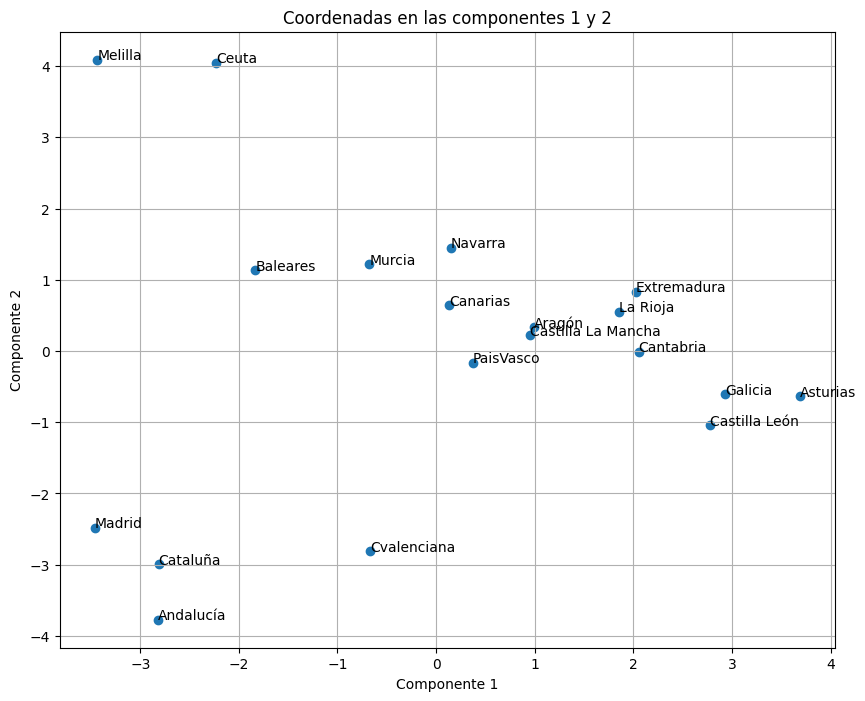

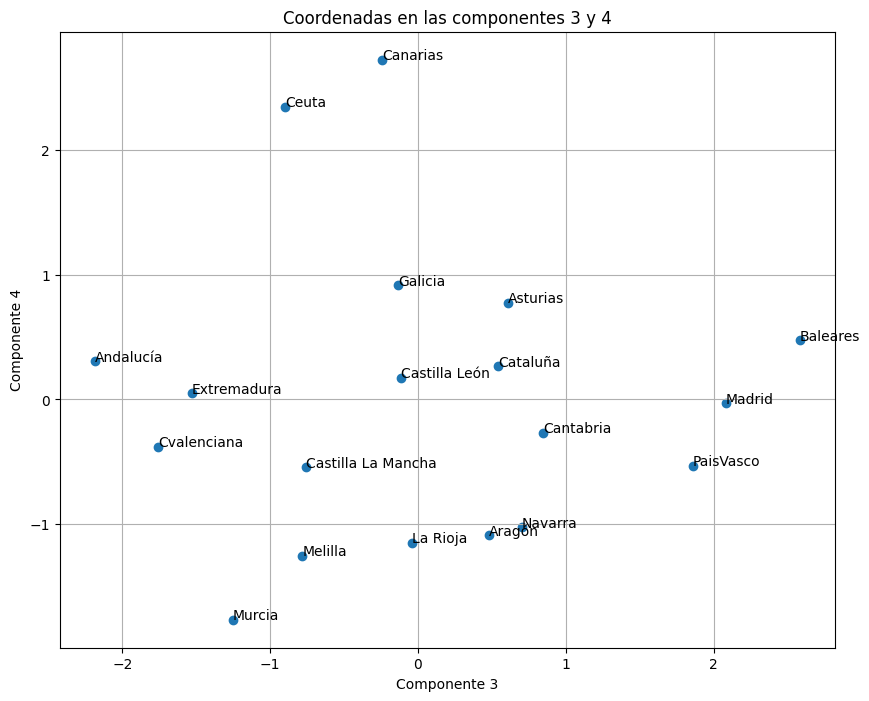

In [ ]:
import matplotlib.pyplot as plt
# Calculamos las coordenadas de las observaciones en las nuevas componentes
scores = pca.transform(datos_estandarizados)
# Graficamos las coordenadas en las componentes 1 y 2
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(scores[:, 0], scores[:, 1])
for i, txt in enumerate(datos.index):
    ax.annotate(txt, (scores[i, 0], scores[i, 1]))
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Coordenadas en las componentes 1 y 2")
ax.grid()
# Graficamos las coordenadas en las componentes 3 y 4
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(scores[:, 2], scores[:, 3])
for i, txt in enumerate(datos.index):
    ax.annotate(txt, (scores[i, 2], scores[i, 3]))
ax.set_xlabel("Componente 3")
ax.set_ylabel("Componente 4")
ax.set_title("Coordenadas en las componentes 3 y 4")
ax.grid()
plt.show()

plt.show()

Las nuevas componentes han permitido analizar las características más destacadas de las comunidades autónomas en términos del mercado hipotecario, el riesgo hipotecario, la estabilidad financiera y la demanda futura.

La primera componente (CP1) se relaciona positivamente con el número de viviendas vacías por cada 100 mil habitantes y el índice de envejecimiento. Esto sugiere que las comunidades autónomas con mayores tasas de envejecimiento tienen más viviendas vacías, lo que puede ser resultado de una menor demanda en el mercado hipotecario debido a la baja tasa de natalidad o las herencias. Las comunidades autónomas que destacan en esta componente son Ceuta, Melilla, Canarias y Asturias, que tienen los mayores índices de envejecimiento y viviendas vacías. 

La segunda componente (CP2) se correlaciona negativamente con la tasa de ejecuciones hipotecarias, el número de personas activas y el número de compraventas en 2021. Las comunidades autónomas con valores altos en esta componente son aquellas que tienen menor riesgo hipotecario y una mayor estabilidad financiera. Cataluña, Madrid y País Vasco son las comunidades autónomas que se destacan en esta componente.

La tercera componente (CP3) está positivamente relacionada con el coste medio de las hipotecas y negativamente relacionada con la tasa de desempleo. Esto sugiere que las comunidades autónomas con un menor nivel de desempleo y con costos de hipoteca más elevados tienen una mayor estabilidad financiera y una menor probabilidad de incumplimiento de pago. Comunidad de Madrid, Cataluña y País Vasco son las comunidades autónomas que se destacan en esta componente.

La cuarta componente (CP4) se correlaciona negativamente con la tasa de natalidad, la tasa de fecundidad y el número de hipotecas por cada 100 mil habitantes. Esto sugiere que las comunidades autónomas con mayores tasas de natalidad y fecundidad tienen una mayor demanda futura en el mercado hipotecario. La Comunidad Valenciana, Andalucía y Castilla-La Mancha son las comunidades autónomas que se destacan en esta componente.

En resumen, las nuevas componentes han permitido identificar patrones y características de las comunidades autónomas en términos de mercado hipotecario, riesgo hipotecario, estabilidad financiera y demanda futura. Este análisis proporciona información valiosa para comprender mejor las diferencias y similitudes entre las comunidades autónomas y puede ser útil para tomar decisiones en términos de políticas públicas y estrategias empresariales.

In [ ]:
from IPython.display import HTML

# Crea un título en negrita y rojo utilizando HTML y CSS
html_tit1 = '<h2 style="text-align:left; color:black;">Paso 4. Análisis Clúster</h2>'

# Muestra el título en negrita y rojo
display(HTML(html_tit1))

Una de las técnicas más utilizadas, dentro de lo que se conoce como aprendizaje no supervisado, es el análisis clúster cuyo objetivo es encontras grupos de observaciones que sean similares entre sí. Los grupos se conformarán de manera que buscamos la homogeneidad interna y la heterogeneidad entre grupos, siendo generalmente mutuamente excluyentes (cada observación pertenece a un solo grupo). 

La diferencia fundamental con respecto a otras técnicas de clasificación es que no se conoce de antemano el número de grupos en los que se divide a la población, ni el valor de la variable que identifica cada grupo. A la hora de preparar los datos, al tener variables en diferentes unidades de medida, es conveniente estandarizarlas. 

Entre todas las distancias que podemos calcular entre clústers, el método Ward es el más utilizado porque nos aseugra la máxima homogeneidad (mínima varianza) dentro de los clúster. Sin embargo, se pueden utilizar la distancia media, del vecino más cercano, distancia entre centroides o del vecino más alejado.

Para presentar los resultados del análisis clúster jerárquico se utiliza este gráfico con estructura de árbol que permite plasmar el proceso de aglomeración y composición de clústeres junto con la distancia entre ellos. Dependiendo de nuestro punto de corte veremos una estructura distinta de k-clústeres.


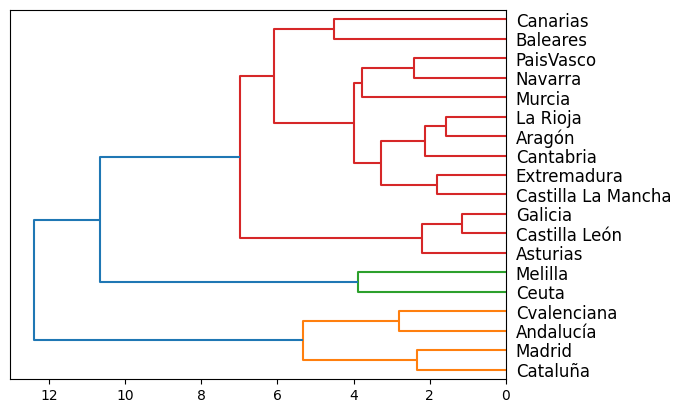

In [ ]:
#!pip install plotly
import plotly.express as px
# Calcular la matriz de enlace
enlace_filas = linkage(datos_estandarizados, method='ward', metric='euclidean')

# Visualizar el dendrograma
dendrogram(enlace_filas, labels=datos.index.tolist(), orientation='left')
plt.show()

El criterio de Elbow elige como número óptimo de clústeres aquel número en el que la variabilidad intra-clústeres ya no se reduce de forma significativa al aumentar uno más.

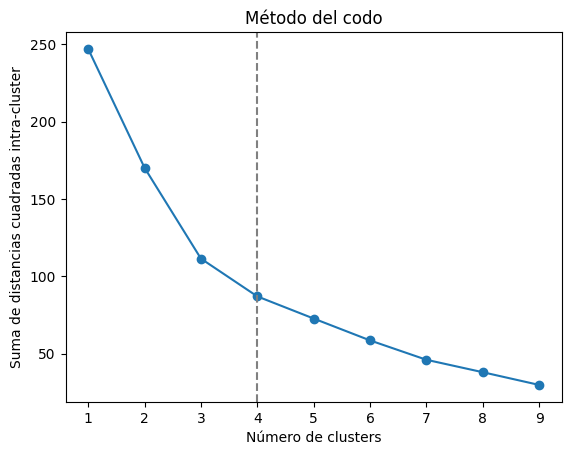

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster')
# Calcular la suma de las distancias cuadradas intra-cluster para diferentes valores de k
distorsiones = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(datos_estandarizados)
    distorsiones.append(kmeans.inertia_)

# Graficar la curva de la suma de las distancias cuadradas intra-cluster vs el número de clusters
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignorar los warnings
    fig, ax = plt.subplots()
    ax.plot(range(1, 10), distorsiones, marker='o')
    ax.axvline(x=4, linestyle='--', color='grey')  # Agregar una línea discontinua en el 4
    ax.set_xlabel('Número de clusters')
    ax.set_ylabel('Suma de distancias cuadradas intra-cluster')
    ax.set_title('Método del codo')
    plt.show()

Una vez que se ha decidido la partición de los clústeres, el siguiente paso consistirá en caracterizarlos. Esto significa, intentar entender las características propias de cada clúster y las diferencias que existen entre ellos con respecto a las variables. Lo primero que debemos tener claro son los individuos que perenecen a cada cluster. 

In [ ]:
def resaltar_cluster(val):
    if val == 0:
        color = 'background-color: yellow'
    elif val == 1:
        color = 'background-color: lightblue'
    elif val == 2:
        color = 'background-color: lightgreen'
    else:
        color = 'background-color: orange'
    return color

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Realizar el clustering aglomerativo con el método de Ward
aglomerativo = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(datos_estandarizados)

# Obtener las etiquetas de cluster
etiquetas_cluster = aglomerativo.labels_

# Crear un DataFrame de Pandas con las observaciones y las etiquetas de cluster correspondientes
df = pd.DataFrame({'Observaciones': datos.index.tolist(), 'Cluster': etiquetas_cluster})

# Aplicar la función "resaltar_cluster" a la columna "Cluster" del DataFrame
styled_df = df.style.applymap(resaltar_cluster, subset=['Cluster'])

display(styled_df)


,Observaciones,Cluster
0,Andalucía,1
1,Aragón,0
2,Asturias,3
3,Baleares,0
4,Canarias,0
5,Cantabria,0
6,Castilla León,3
7,Castilla La Mancha,0
8,Cataluña,1
9,Cvalenciana,1


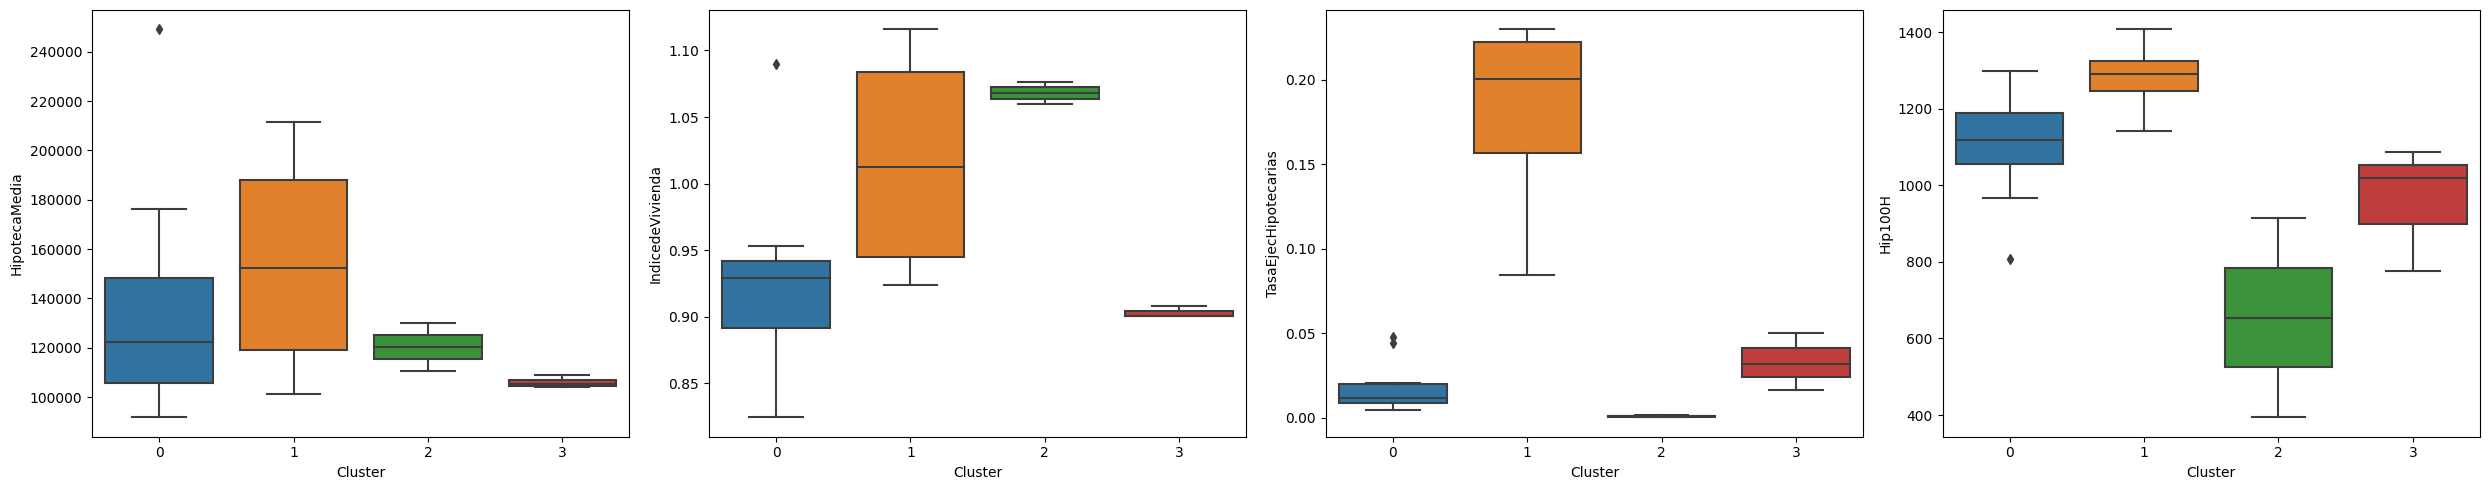

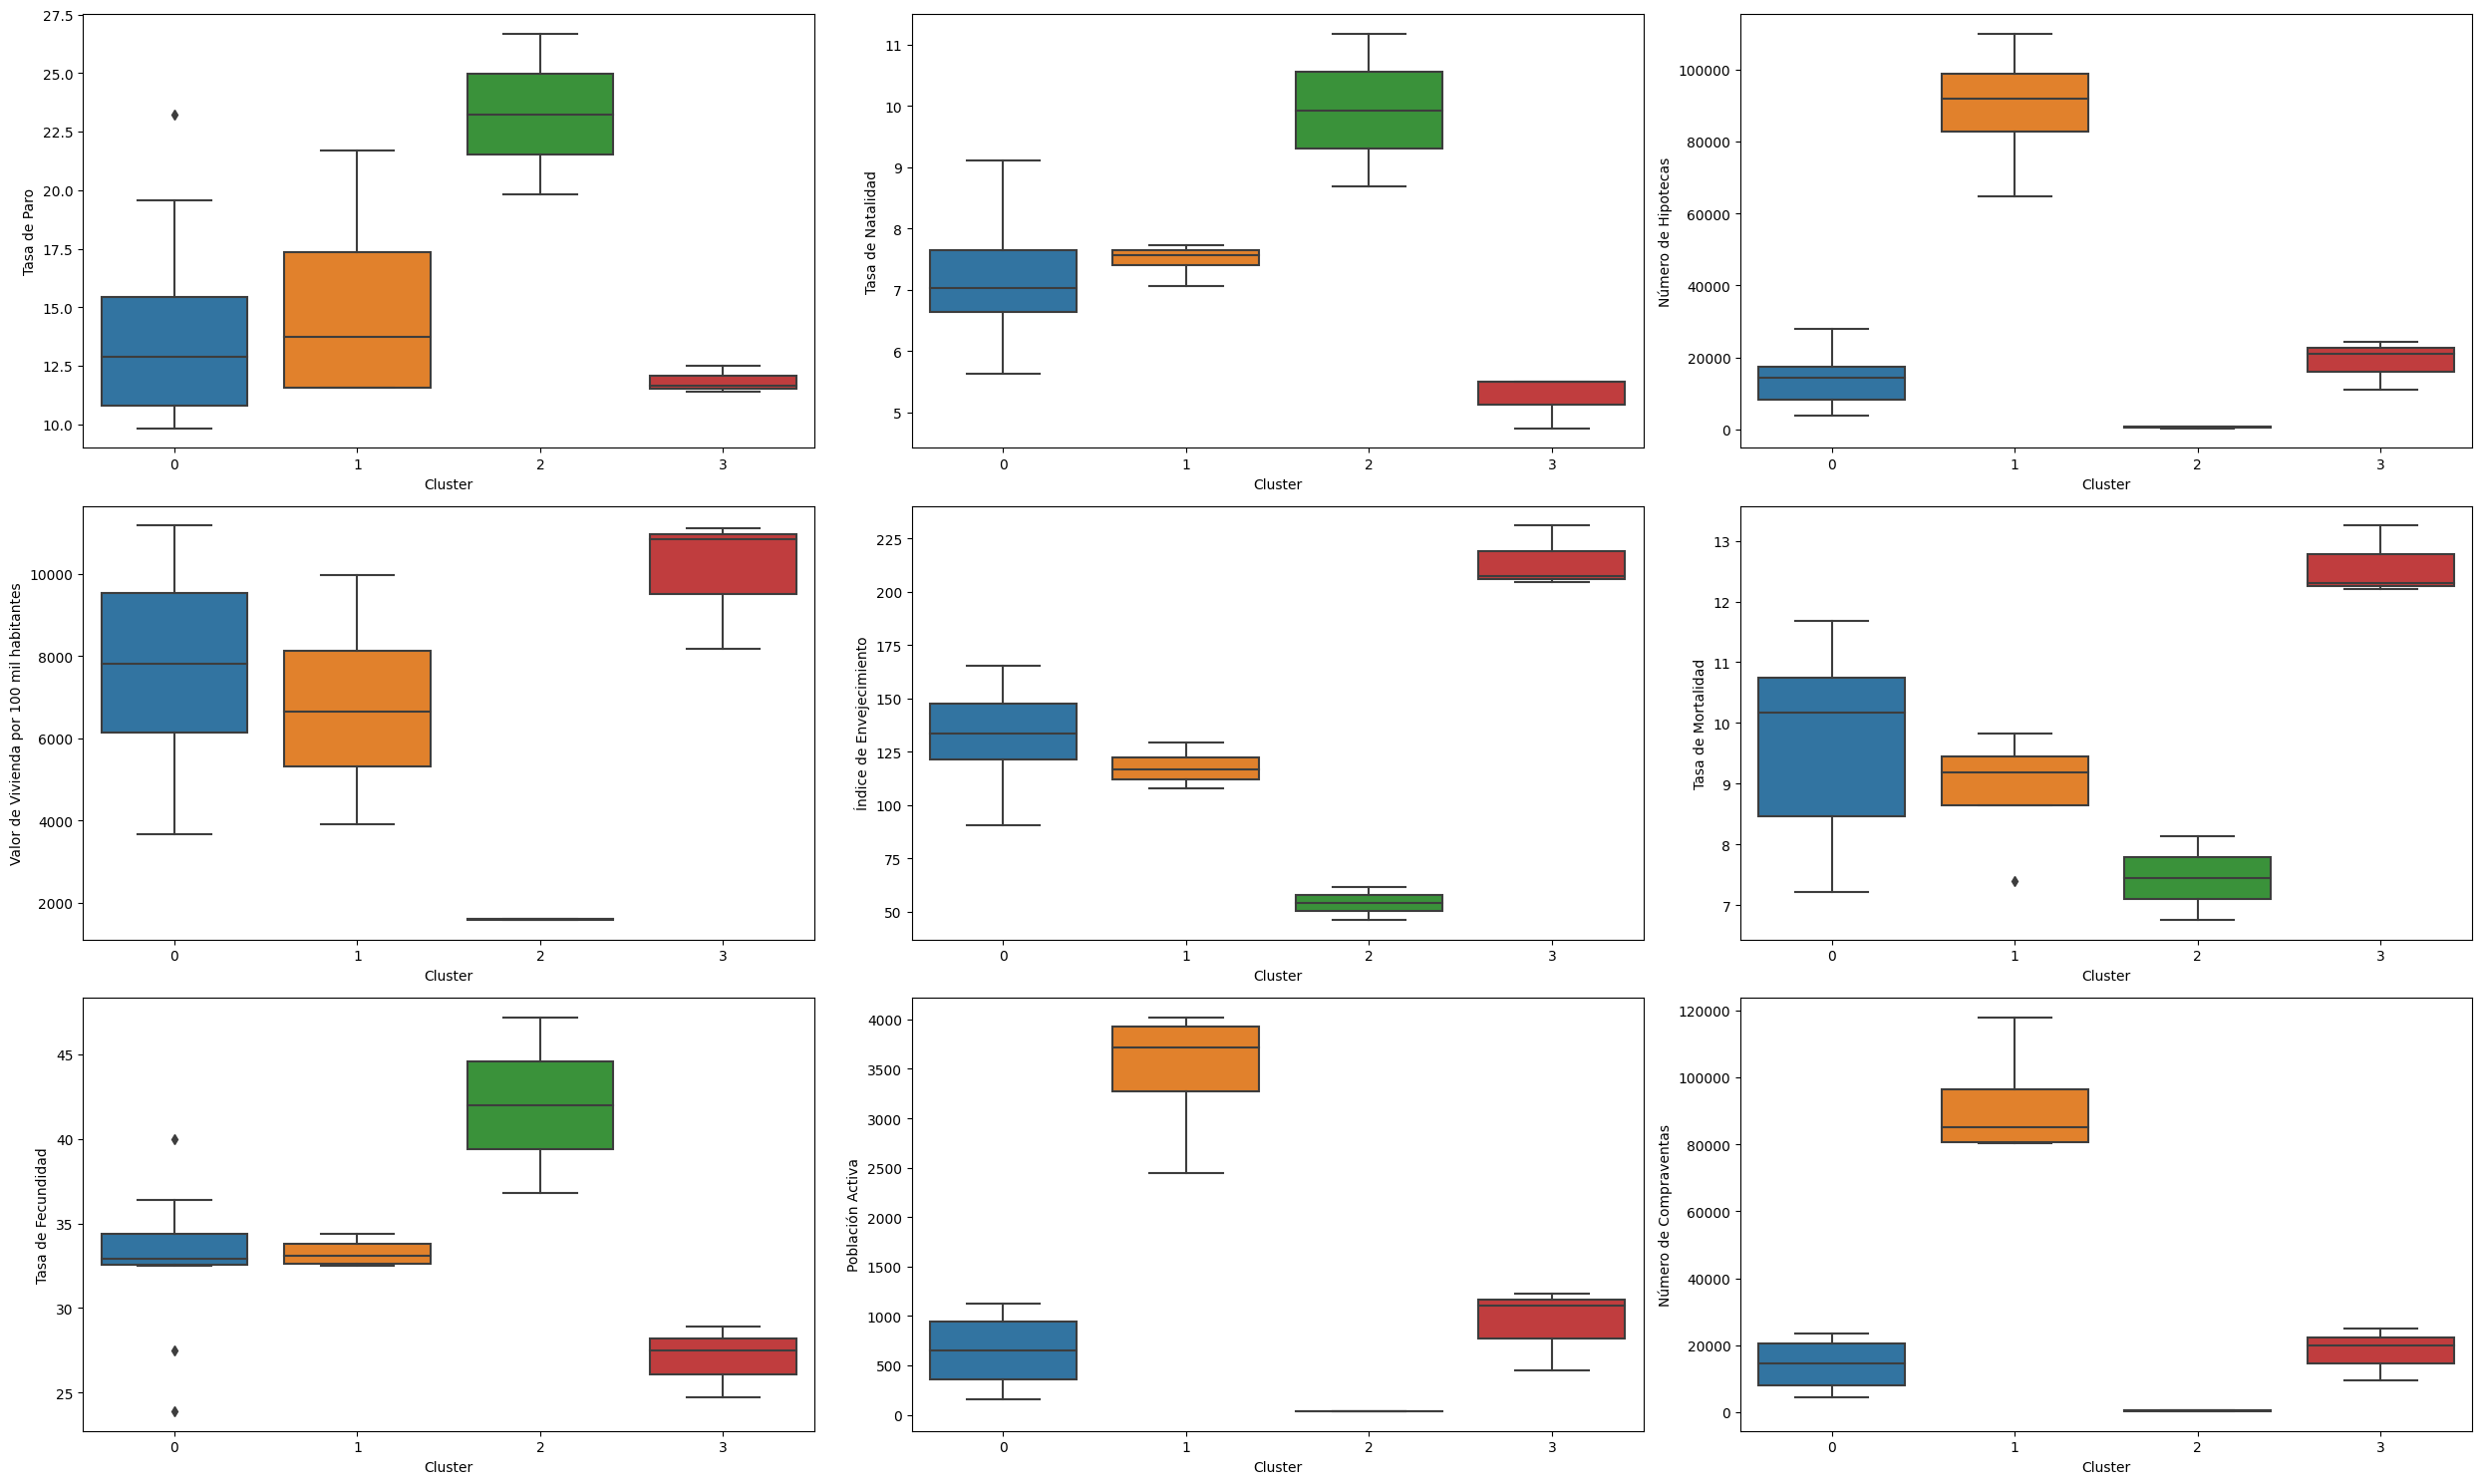

In [ ]:
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con las variables de interés y las etiquetas de cluster
df = pd.DataFrame({'HipotecaMedia': datos['HipotecaMedia'], 
                   'IndicedeVivienda': datos['IndicedeVivienda'], 
                   'TasaEjecHipotecarias': datos['TasaEjecHipotecarias'], 
                   'Hip100H': datos['Hip100H'],
                   'Cluster': etiquetas_cluster})

# Crear figura con 4 subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

# Graficar boxplots en cada subplot
sns.boxplot(data=df, x='Cluster', y='HipotecaMedia', ax=axs[0])
sns.boxplot(data=df, x='Cluster', y='IndicedeVivienda', ax=axs[1])
sns.boxplot(data=df, x='Cluster', y='TasaEjecHipotecarias', ax=axs[2])
sns.boxplot(data=df, x='Cluster', y='Hip100H', ax=axs[3])

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar gráfico
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame de Pandas con la variable y la etiqueta de cluster correspondiente para cada observación
df1 = pd.DataFrame({'Tasa de Paro': datos['TasaParo'], 'Cluster': etiquetas_cluster})
df2 = pd.DataFrame({'Tasa de Natalidad': datos['TasaNatalidad'], 'Cluster': etiquetas_cluster})
df3 = pd.DataFrame({'Número de Hipotecas': datos['NumHip'], 'Cluster': etiquetas_cluster})
df4 = pd.DataFrame({'Valor de Vivienda por 100 mil habitantes': datos['VV100H'], 'Cluster': etiquetas_cluster})
df5 = pd.DataFrame({'Índice de Envejecimiento': datos['IndEnvej'], 'Cluster': etiquetas_cluster})
df6 = pd.DataFrame({'Tasa de Mortalidad': datos['TasaMortalidad'], 'Cluster': etiquetas_cluster})
df7 = pd.DataFrame({'Tasa de Fecundidad': datos['TasaFecundidad'], 'Cluster': etiquetas_cluster})
df8 = pd.DataFrame({'Población Activa': datos['Activos'], 'Cluster': etiquetas_cluster})
df9 = pd.DataFrame({'Número de Compraventas': datos['Compravent'], 'Cluster': etiquetas_cluster})

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))

# Graficar un boxplot de cada variable en función de los clusters
sns.boxplot(data=df1, x='Cluster', y='Tasa de Paro', ax=axs[0,0])
sns.boxplot(data=df2, x='Cluster', y='Tasa de Natalidad', ax=axs[0,1])
sns.boxplot(data=df3, x='Cluster', y='Número de Hipotecas', ax=axs[0,2])
sns.boxplot(data=df4, x='Cluster', y='Valor de Vivienda por 100 mil habitantes', ax=axs[1,0])
sns.boxplot(data=df5, x='Cluster', y='Índice de Envejecimiento', ax=axs[1,1])
sns.boxplot(data=df6, x='Cluster', y='Tasa de Mortalidad', ax=axs[1,2])
sns.boxplot(data=df7, x='Cluster', y='Tasa de Fecundidad', ax=axs[2,0])
sns.boxplot(data=df8, x='Cluster', y='Población Activa', ax=axs[2,1])
sns.boxplot(data=df9, x='Cluster', y='Número de Compraventas', ax=axs[2,2])

plt.tight_layout()
plt.show()



Según el análisis realizado sobre los clusters de hipotecas en España, se puede afirmar que el primer cluster no presenta características tan definidas como los otros tres. Este cluster está compuesto por las comunidades autónomas que no se incluyeron en los otros clusters: Aragón, Baleares, Cantabria, Canarias, Castilla-La Mancha, Extremadura, La Rioja, Murcia, Navarra y País Vasco.

Al agrupar estas comunidades en un único cluster, se observa una hipoteca media inferior al cluster 2 y una tasa de ejecución hipotecaria también inferior a la del cluster 4. En términos sociodemográficos, este cluster no presenta tasas significativamente altas o bajas de natalidad, fecundidad, envejecimiento o mortalidad en comparación con los otros clusters. Además, la población activa y el número de compraventas son similares al cluster 4.

Si se hubiera utilizado una distancia menor para la agrupación de las comunidades autónomas, es posible que se hubieran generado dos subclusters, uno para las islas y otro para las comunidades de interior. Sin embargo, en la estructura actual del análisis, no tendría sentido estudiar este cluster en particular ya que se trata de una mezcla de varias comunidades autónomas que tienen características propias y un interés específico en cuanto a hipotecas y mercado inmobiliario.

El segundo cluster de comunidades autónomas, compuesto por **Andalucía, Cataluña, Comunidad Valenciana y Comunidad de Madrid**, se caracteriza por presentar la mayor media en hipotecas, con un índice del precio de la vivienda superior al promedio nacional. Asimismo, registra una tasa elevada de ejecuciones hipotecarias, aunque al mismo tiempo se observa una mayor concesión de hipotecas por cada 100.000 habitantes. En términos sociodemográficos, este clúster no presenta tasas significativamente altas de natalidad, fecundidad, envejecimiento o mortalidad. Cabe destacar que se trata del clúster con mayor proporción de población activa en edad laboral.
**En resumen, podríamos decir que es un cluster financieramente activo, económicamente fuerte, joven, dinámico y con un mercado inmobiliario potente que está formado por comunidades en pleno crecimiento, con alta demanda de vivienda y con potencial de inversión inmobiliaria.**

El tercer cluster está compuesto por las ciudades autónomas de **Ceuta y Melilla.** En este cluster, se observa una hipoteca media muy baja en comparación con los otros clusters, pero el índice de precios de la vivienda es el más alto de los cuatro clusters. Es interesante notar que la tasa de ejecución hipotecaria es muy baja en este cluster y, en general, se conceden menos hipotecas en estas regiones. Por otro lado, el cluster tiene la mayor tasa de paro y de natalidad en comparación con los otros clusters. En términos sociodemográficos, el índice de envejecimiento y la tasa de mortalidad son los más bajos, mientras que la tasa de fecundidad es la más alta de los cuatro clusters.

Además, la población activa y el número de compraventas son muy bajos en este cluster. Esto puede deberse en parte a la ubicación geográfica de Ceuta y Melilla, que son ciudades autónomas situadas en la costa norte de África y tienen una economía y un mercado inmobiliario muy diferentes a los de la península española. La alta tasa de fecundidad puede ser el resultado de factores culturales y sociales únicos de estas regiones. **En resumen, es el cluster de las islas y ciudades autónomas, que son fronterizas. Son lugares con dinámicas cambiantes, jóvenes y en desarrollo que están llevando a cabo una transición demográfica y económica.**

El cuarto cluster de comunidades autónomas está compuesto por **Asturias,  Castilla y León y Galicia** Se caracteriza por tener una hipoteca media inferior al cluster 1, un índice del precio de la vivienda por debajo del total nacional, una tasa baja de ejecuciones hipotecarias, y una tasa de paro media superior a la del cluster 1. En términos sociodemográficos, este cluster presenta una tasa de natalidad media inferior, un envejecimiento más pronunciado con una tasa de mortalidad media menor pero con mayor variabilidad, y una tasa de fecundidad media similar al primer cluster pero con mayor variabilidad. Además, tiene una población activa bastante inferior a la del primer cluster y un número de compraventas significativamente menor. **En resumen, podríamos decir que es un cluster de baja ejecución hipotecaria, con envejecimiento acelerado, con precios de viviendas asequibles, formado por comunidades de la España rural e histórica, con regiones del norte.**